In [1]:
from models.temporal_medical import DKF
#Load model to sample from
MFILE = '../../expt-medical/chkpt_filtered3months_indicators/DKF_lr-8_0000e-04-vm-lstm-inf-mean_field-dh-200-ds-20-nl-relu-opt-adam-bs-250-ep-2000-rd-2_0000e-01-rs-300-tl-2-el-2-ttype-mlp-etype-mlp-ar-1_0000e+01-iw-1_0000e-01-uid'
reloadFile = MFILE+'-EP1900-params.npz'
pfile      = MFILE+'-config.pkl'
print 'Reloading trained model from : ',reloadFile
print 'Assuming ',pfile,' corresponds to model'

params= {}
params['seed'] = 1
params['seed'] = 1
dkf  = DKF(params, paramFile = pfile, reloadFile = reloadFile)

Using gpu device 0: Quadro K620 (CNMeM is disabled, cuDNN 5103)


ImportError: No module named temporal_medical

In [3]:
%matplotlib inline  
import glob,h5py,os,re
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth']=2.5
mpl.rcParams['lines.markersize']=8
mpl.rcParams['text.usetex']=True
mpl.rcParams['text.latex.unicode']=True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['text.latex.preamble']= ['\usepackage{amsfonts}','\usepackage{amsmath}']
mpl.rcParams['font.size'] = 20
mpl.rcParams['axes.labelsize']=20
mpl.rcParams['legend.fontsize']=20
from utils.misc import readPickle
import sys
sys.path.append('../../medical_data/')
#http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
from load import loadMedicalData
dset = 'A'
dataset = loadMedicalData(dset)
from medical import cleanLabels
print dataset.keys()
patient_dict =  cleanLabels(dataset['obs_dict'])
doctor_dict =  cleanLabels(dataset['act_dict'])

results = readPickle('../../expt-medical-fast/check_evaluation.pkl',nobjects = 3)
evaldict = results[0]
cfacdict = results[1]
sampleCfac = results[2]
print evaldict.keys()
print cfacdict.keys()
print sampleCfac.keys()

['ind_dict', u'test_obs', u'train_obs', 'data_type', u'valid_ind', 'dim_observations', 'act_dict', u'valid_act', 'obs_dict', u'test_ind', 'dim_indicators', u'train_ind', u'test_act', 'test_mask', 'valid_mask', u'valid_obs', 'train_mask', 'dim_actions', 'mids', u'train_act']
Read  3  objects
['a_s', 'x_s']
[0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 13, 15, 16, 18, 19, 20, 21, 23, 24, 26, 28, 30, 32, 35, 36, 37, 38, 40, 41, 42, 43, 46, 47, 48, 49, 50, 52, 54, 57, 58, 61, 62, 63, 65, 66, 67, 68, 70, 72, 73, 74, 77, 79, 80, 81, 82, 85, 87, 88, 89, 91, 92, 93, 95, 96, 99, 100, 101, 105, 107, 108, 110, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 124, 127, 128, 129, 130, 132, 136, 139, 142, 144, 145, 146, 148, 151, 156, 157, 158, 159, 160, 161, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 175, 178, 179, 180, 181, 184, 185, 186, 188, 190, 192, 194, 195, 196, 197, 198, 203, 204, 205, 206, 210, 212, 213, 214, 215, 220, 221, 222, 224, 226, 227, 228, 231, 234, 235, 236, 237, 239, 240, 241, 242, 2

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
patient_data   = evaldict['x_s']
doctor_data    = evaldict['a_s']
patdict_data   = patient_dict
docdict_data   = doctor_dict

shufidx = np.random.permutation(patient_data.shape[0])
for ctr in range(5):
    idx = shufidx[ctr]
    row_labels = patdict_data
    data = patient_data[idx,:,:]
    column_labels = range(1,data.shape[0]+1)
    fig, axlist = plt.subplots(1,2,figsize=(8,10))
    #fig.suptitle('Patient: '+mids_data[idx])
    ax = axlist[0]
    heatmap = ax.pcolor(data.transpose(), cmap=plt.cm.Blues)

    # put the major ticks at the middle of each cell
    ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)

    # want a more natural, table-like display
    #ax.invert_xaxis()
    ax.xaxis.tick_top()

    ax.tick_params(labelsize = 12)
    ax.set_xticklabels(column_labels, minor=False)
    ax.set_yticklabels(row_labels, minor=False)

    ax = axlist[1]
    data = doctor_data[idx,:,:]
    column_labels = range(1,data.shape[0]+1)
    row_labels = docdict_data
    heatmap = ax.pcolor(data.transpose(), cmap=plt.cm.Blues)

    # put the major ticks at the middle of each cell
    ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)

    # want a more natural, table-like display
    #ax.invert_xaxis()
    ax.xaxis.tick_top()
    ax.yaxis.tick_right()

    ax.tick_params(labelsize = 12)
    ax.set_xticklabels(column_labels, minor=False)
    ax.set_yticklabels(row_labels, minor=False)
    
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

patdict_data   = patient_dict
docdict_data   = doctor_dict

shufidx = cfacdict.keys()
for ctr in range(5):
    idx = shufidx[ctr]
    row_labels = patdict_data
    data = cfacdict[idx]['x_nodrug'].squeeze()
    column_labels = range(1,data.shape[0]+1)
    fig, axlist = plt.subplots(1,2,figsize=(8,10))
    #fig.suptitle('Patient: '+mids_data[idx])
    ax = axlist[0]
    heatmap = ax.pcolor(data.transpose(), cmap=plt.cm.Blues)

    # put the major ticks at the middle of each cell
    ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)

    # want a more natural, table-like display
    #ax.invert_xaxis()
    ax.xaxis.tick_top()

    ax.tick_params(labelsize = 12)
    ax.set_xticklabels(column_labels, minor=False)
    ax.set_yticklabels(row_labels, minor=False)

    ax = axlist[1]
    data = cfacdict[idx]['a_nodrug'].squeeze()
    column_labels = range(1,data.shape[0]+1)
    row_labels = docdict_data
    heatmap = ax.pcolor(data.transpose(), cmap=plt.cm.Blues)

    # put the major ticks at the middle of each cell
    ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)

    # want a more natural, table-like display
    #ax.invert_xaxis()
    ax.xaxis.tick_top()
    ax.yaxis.tick_right()

    ax.tick_params(labelsize = 12)
    ax.set_xticklabels(column_labels, minor=False)
    ax.set_yticklabels(row_labels, minor=False)
    
    plt.show()

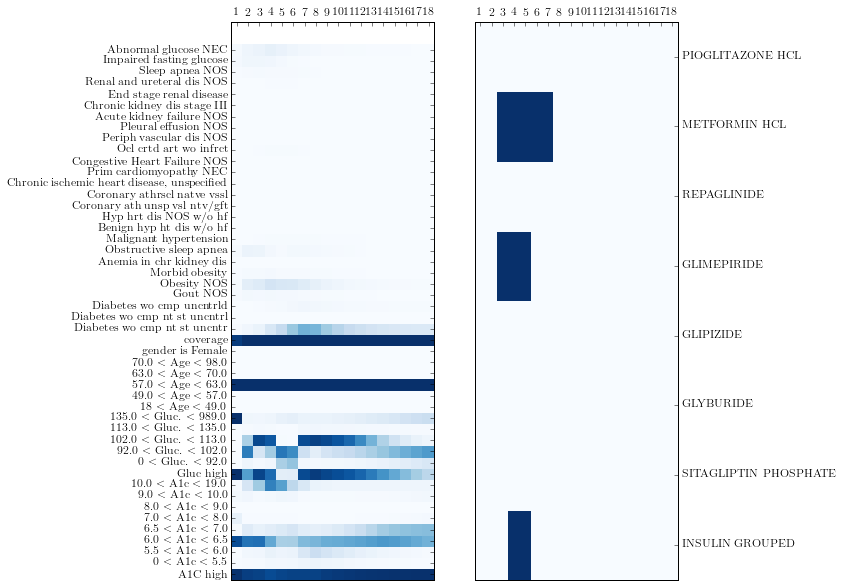

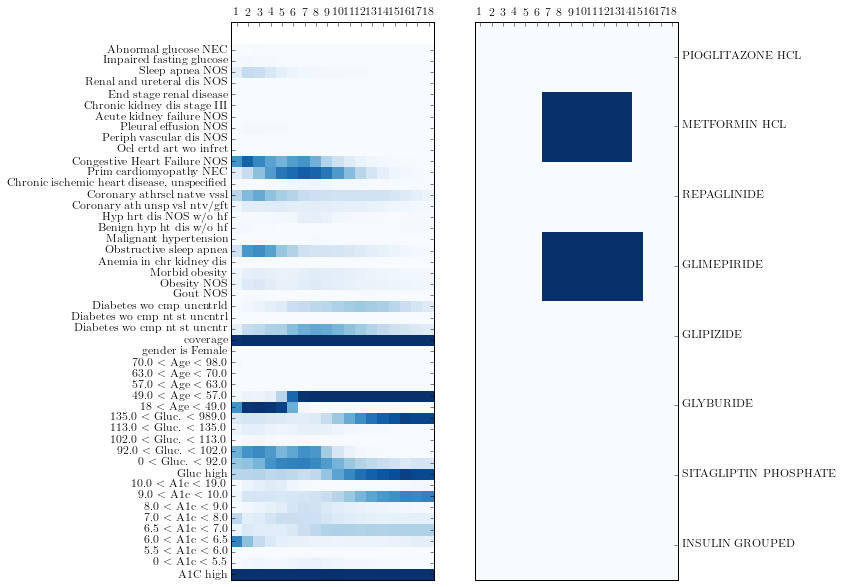

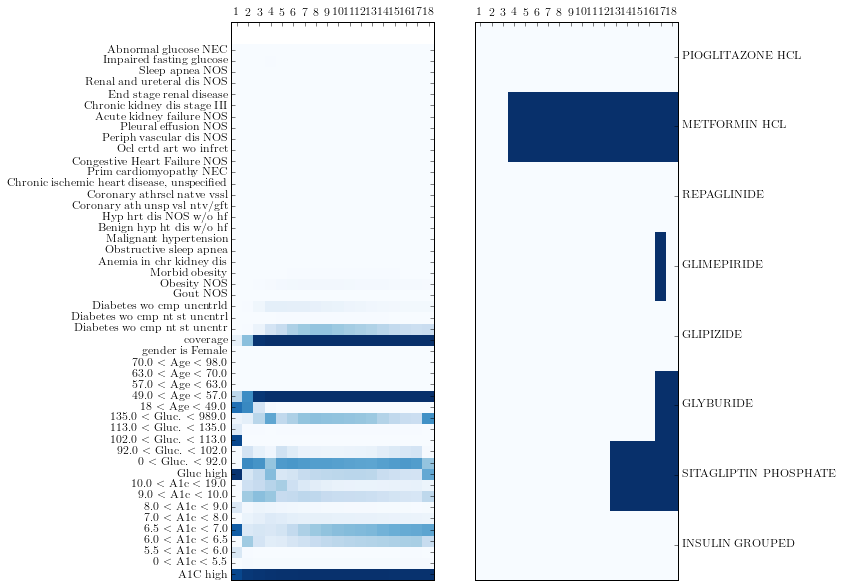

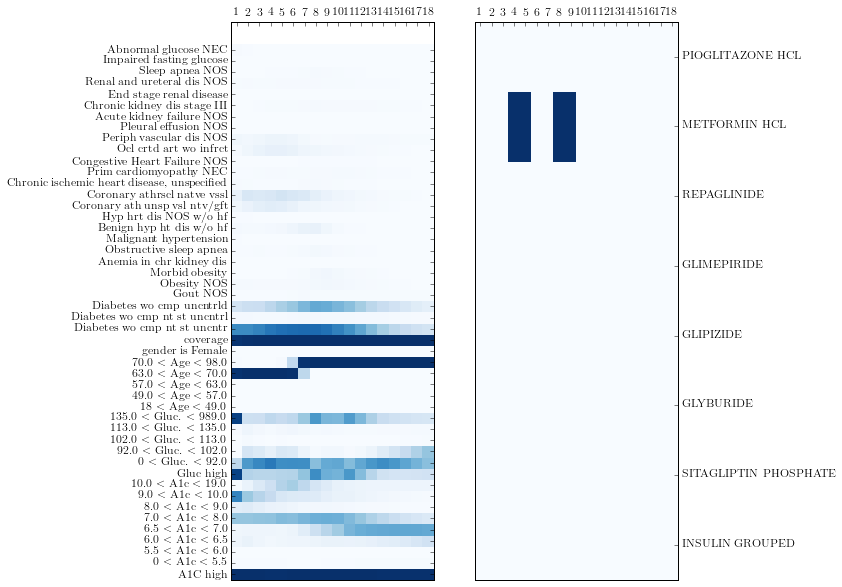

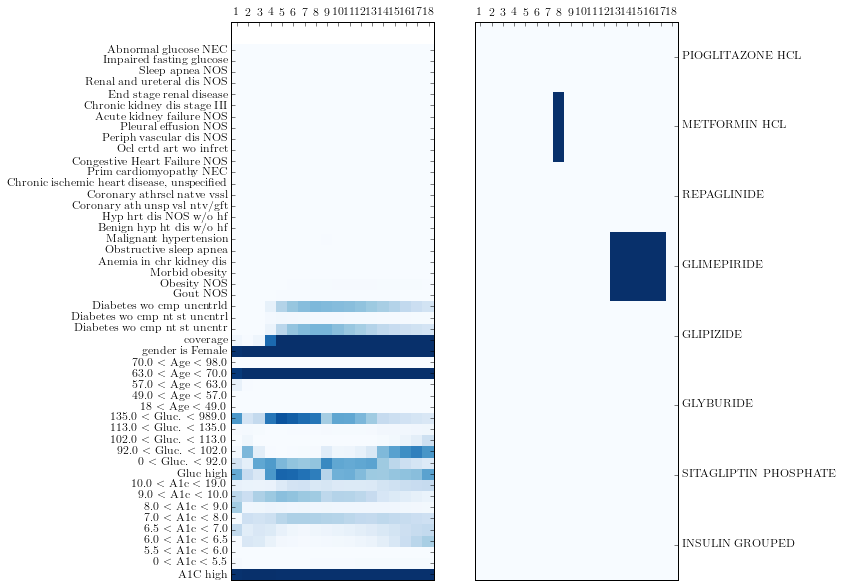

In [10]:
import matplotlib.pyplot as plt
import numpy as np

patdict_data   = patient_dict
docdict_data   = doctor_dict

shufidx = np.arange(sampleCfac['x_nodrug'].shape[0])
for ctr in range(5):
    idx = shufidx[ctr]
    row_labels = patdict_data
    data = sampleCfac['x_drug'][idx]
    column_labels = range(1,data.shape[0]+1)
    fig, axlist = plt.subplots(1,2,figsize=(8,10))
    #fig.suptitle('Patient: '+mids_data[idx])
    ax = axlist[0]
    heatmap = ax.pcolor(data.transpose(), cmap=plt.cm.Blues)

    # put the major ticks at the middle of each cell
    ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)

    # want a more natural, table-like display
    #ax.invert_xaxis()
    ax.xaxis.tick_top()

    ax.tick_params(labelsize = 12)
    ax.set_xticklabels(column_labels, minor=False)
    ax.set_yticklabels(row_labels, minor=False)

    ax = axlist[1]
    data = sampleCfac['a_drug'][idx]
    column_labels = range(1,data.shape[0]+1)
    row_labels = docdict_data
    heatmap = ax.pcolor(data.transpose(), cmap=plt.cm.Blues)

    # put the major ticks at the middle of each cell
    ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)

    # want a more natural, table-like display
    #ax.invert_xaxis()
    ax.xaxis.tick_top()
    ax.yaxis.tick_right()

    ax.tick_params(labelsize = 12)
    ax.set_xticklabels(column_labels, minor=False)
    ax.set_yticklabels(row_labels, minor=False)
    
    plt.show()